# **This is a data analysis project using Python. The Netflix dataset was selected. This project was developed by students *Zainab Al-Farihat and Diana Ez Al-Deen*.**
# **We did our best to reflect our understanding of the data at hand, discussing, researching, and utilizing available resources to address the issues, draw conclusions, and present them well.**

# **import libraries and connect with Data set in Google Drive**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
file_path = '/content/drive/MyDrive/Data/netflix_titles.csv'
df = pd.read_csv(file_path)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **Check Data Type**

In [3]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


# **Change the Data Type of "data_added" column to Date**

In [4]:
#df['date_added'] = df['date_added'].astype('datetime64[ns]')
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


# **When we performed the direct conversion, although the number of empty values ​​was 10, but  NaT it increased because there were some dates that we considered invalid.**
# **So we used several methods, but they didn't work.**
# **In the end, we divided the date into several columns (year, month, day), processed them, then combined them and substituted the values.**

In [5]:

# Convert column allowing false values
df['date_added_converted'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create a column that shows values ​​that were not converted ( converted to NaT)
df['invalid_date'] = df['date_added'][df['date_added_converted'].isna()]


invalid_dates = df[df['invalid_date'].notna()][['show_id', 'date_added', 'invalid_date']]
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_converted,invalid_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,NaN
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,NaN


In [6]:
# Create New columns from date_added
df['month_text'] = df['date_added'].str.extract(r'([A-Za-z]+)')
df['day'] = df['date_added'].str.extract(r'(\d{1,2})')
df['year'] = df['date_added'].str.extract(r'(\d{4})')

In [7]:
# convert month to number
month_map = {
    'January': 1, 'Jan': 1,
    'February': 2, 'Feb': 2,
    'March': 3, 'Mar': 3,
    'April': 4, 'Apr': 4,
    'May': 5,
    'June': 6, 'Jun': 6,
    'July': 7, 'Jul': 7,
    'August': 8, 'Aug': 8,
    'September': 9, 'Sept': 9, 'Sep': 9,
    'October': 10, 'Oct': 10,
    'November': 11, 'Nov': 11,
    'December': 12, 'Dec': 12
}

df['month_num'] = df['month_text'].map(month_map)

In [8]:
# Date Reassembling
df['date_reconstructed'] = pd.to_datetime(
    df[['year', 'month_num', 'day']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)

/tmp/ipython-input-526771025.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_reconstructed'] = pd.to_datetime(


In [9]:
df['date_added_fixed'] = df['date_added']
df['date_added_fixed'] = df['date_added_fixed'].fillna(df['date_reconstructed'])

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [11]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8807 non-null   object        
 1   type                  8807 non-null   object        
 2   title                 8807 non-null   object        
 3   director              6173 non-null   object        
 4   cast                  7982 non-null   object        
 5   country               7976 non-null   object        
 6   date_added            8709 non-null   datetime64[ns]
 7   release_year          8807 non-null   int64         
 8   rating                8803 non-null   object        
 9   duration              8804 non-null   object        
 10  listed_in             8807 non-null   object        
 11  description           8807 non-null   object        
 12  date_added_converted  8709 non-null   datetime64[ns]
 13  invalid_date      

In [13]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_converted,invalid_date,month_text,day,year,month_num,date_reconstructed,date_added_fixed
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,NaN,September,25,2021,9.0,NaT,"September 25, 2021"
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,NaN,September,24,2021,9.0,NaT,"September 24, 2021"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,NaN,September,24,2021,9.0,NaT,"September 24, 2021"
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,NaN,September,24,2021,9.0,NaT,"September 24, 2021"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,NaN,September,24,2021,9.0,NaT,"September 24, 2021"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,NaN,November,20,2019,11.0,NaT,"November 20, 2019"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,NaN,July,1,2019,7.0,NaT,"July 1, 2019"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,NaN,November,1,2019,11.0,NaT,"November 1, 2019"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,NaN,January,11,2020,1.0,NaT,"January 11, 2020"


# **Check null value in Each column**

In [14]:
df.shape

(8807, 20)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8807 non-null   object        
 1   type                  8807 non-null   object        
 2   title                 8807 non-null   object        
 3   director              6173 non-null   object        
 4   cast                  7982 non-null   object        
 5   country               7976 non-null   object        
 6   date_added            8709 non-null   datetime64[ns]
 7   release_year          8807 non-null   int64         
 8   rating                8803 non-null   object        
 9   duration              8804 non-null   object        
 10  listed_in             8807 non-null   object        
 11  description           8807 non-null   object        
 12  date_added_converted  8709 non-null   datetime64[ns]
 13  invalid_date      

# **There are six columns containing NaN value "Director, Cast, Country, Date_added, Rating, Duration"**

# **will start with Duration Column to check NaN Value in their records**

In [16]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_converted,invalid_date,month_text,day,year,month_num,date_reconstructed,date_added_fixed
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04,NaN,April,4,2017,4.0,NaT,"April 4, 2017"
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16,NaN,September,16,2016,9.0,NaT,"September 16, 2016"
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016-08-15,NaN,August,15,2016,8.0,NaT,"August 15, 2016"


# **Oh that Seams the data fell by mistake in Rationg column so we will move it to correct column**

In [17]:
df['duration'] = df['duration'].fillna(df['rating'])

# **we will handalling the mistake data and NaN value in Ration column**

**the best full  for nan value in rating is Unrating**

In [18]:
df['rating'] = df['rating'].fillna("Not Rated")

In [19]:
df['rating'] = df['rating'].replace(['74 min', '84 min', '66 min'], 'Not Rated')

In [20]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8807 non-null   object        
 1   type                  8807 non-null   object        
 2   title                 8807 non-null   object        
 3   director              6173 non-null   object        
 4   cast                  7982 non-null   object        
 5   country               7976 non-null   object        
 6   date_added            8709 non-null   datetime64[ns]
 7   release_year          8807 non-null   int64         
 8   rating                8807 non-null   object        
 9   duration              8807 non-null   object        
 10  listed_in             8807 non-null   object        
 11  description           8807 non-null   object        
 12  date_added_converted  8709 non-null   datetime64[ns]
 13  invalid_date      

# **check recordes for NaT value in "date_added" column**

In [22]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_converted,invalid_date,month_text,day,year,month_num,date_reconstructed,date_added_fixed
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa...",NaT,"August 4, 2017",August,4,2017,8.0,NaT,"August 4, 2017"
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
6177,s6178,TV Show,忍者ハットリくん,NaN,NaN,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto...",NaT,"December 23, 2018",December,23,2018,12.0,NaT,"December 23, 2018"
6213,s6214,TV Show,Bad Education,NaN,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf...",NaT,"December 15, 2018",December,15,2018,12.0,NaT,"December 15, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,NaT,"January 8, 2018",January,8,2018,1.0,NaT,"January 8, 2018"
8557,s8558,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,NaT,"December 25, 2015",December,25,2015,12.0,NaT,"December 25, 2015"
8684,s8685,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",NaT,"August 1, 2017",August,1,2017,8.0,NaT,"August 1, 2017"
8712,s8713,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...,NaT,"March 31, 2017",March,31,2017,3.0,NaT,"March 31, 2017"


In [23]:
df['date_added'].min()

Timestamp('2008-01-01 00:00:00')

# **There is no relationship between the two columns "release_year", "date_added".. and the min value in column date_added is 2008-1-1 so NaT values in"date_added" ​​will be replaced with "2000-01-01" as a default value for null and will replace the fixed date **

In [24]:
df['date_added'] = df['date_added'].fillna(df['date_added_fixed'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8807 non-null   object        
 1   type                  8807 non-null   object        
 2   title                 8807 non-null   object        
 3   director              6173 non-null   object        
 4   cast                  7982 non-null   object        
 5   country               7976 non-null   object        
 6   date_added            8797 non-null   object        
 7   release_year          8807 non-null   int64         
 8   rating                8807 non-null   object        
 9   duration              8807 non-null   object        
 10  listed_in             8807 non-null   object        
 11  description           8807 non-null   object        
 12  date_added_converted  8709 non-null   datetime64[ns]
 13  invalid_date      

In [26]:
df['date_added'] = df['date_added'].fillna("2000-01-01")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8807 non-null   object        
 1   type                  8807 non-null   object        
 2   title                 8807 non-null   object        
 3   director              6173 non-null   object        
 4   cast                  7982 non-null   object        
 5   country               7976 non-null   object        
 6   date_added            8807 non-null   object        
 7   release_year          8807 non-null   int64         
 8   rating                8807 non-null   object        
 9   duration              8807 non-null   object        
 10  listed_in             8807 non-null   object        
 11  description           8807 non-null   object        
 12  date_added_converted  8709 non-null   datetime64[ns]
 13  invalid_date      

# **Alot of missing Value in column "Director,Cast and Country" so no way to know what is it, so we will fill it "Unknown"**

In [28]:
df['director'] = df['director'].fillna("Unknown")

In [29]:
df['cast'] = df['cast'].fillna("Unknown")

In [30]:
df['country'] = df['country'].fillna("Unknown")

# **Missing vaule handled**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8807 non-null   object        
 1   type                  8807 non-null   object        
 2   title                 8807 non-null   object        
 3   director              8807 non-null   object        
 4   cast                  8807 non-null   object        
 5   country               8807 non-null   object        
 6   date_added            8807 non-null   object        
 7   release_year          8807 non-null   int64         
 8   rating                8807 non-null   object        
 9   duration              8807 non-null   object        
 10  listed_in             8807 non-null   object        
 11  description           8807 non-null   object        
 12  date_added_converted  8709 non-null   datetime64[ns]
 13  invalid_date      

#**Check if there is any duplicate value**

In [32]:
df['show_id'].nunique()

8807

In [33]:
df['title'].nunique()

8807

# **Delete all added columns**

In [34]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_converted', 'invalid_date', 'month_text', 'day', 'year',
       'month_num', 'date_reconstructed', 'date_added_fixed'],
      dtype='object')

In [35]:
df.drop(columns=['date_added_converted', 'invalid_date', 'month_text', 'day', 'year',
       'month_num', 'date_reconstructed', 'date_added_fixed'], inplace=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# ***Data is redy to analysis***
# **will start answer the Questions**

# *********************************

# **Q1: What is the distribution between Movies and TV Shows on Netflix? **

In [37]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [38]:
dist = df['type'].value_counts(normalize=True) * 100
formatted = dist.apply(lambda x: f"{x:.1f}%")
formatted

,proportion
type,
Movie,69.6%
TV Show,30.4%


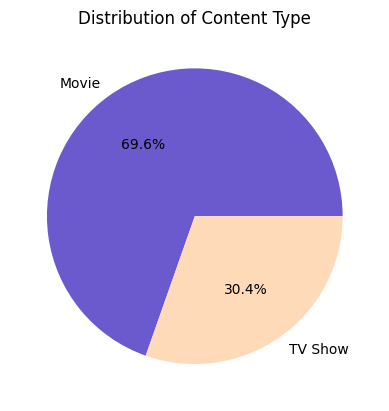

In [39]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['slateblue', 'peachpuff'], title='Distribution of Content Type')
plt.ylabel('')
plt.show()

# **Q2: What are the top genres listed on Netflix? **

# **To access the genres, we need the column 'listed_in'.**
# **But in some records, it contains multiple values, so we need to separate the values ​​into columns.**
# **then show what is the top genres**

In [40]:

genres_series = df['listed_in'].dropna().str.split(', ')

In [41]:
#Convert the list to a single set and count duplicates:
all_genres = genres_series.explode()
top_genres = all_genres.value_counts()

In [42]:
print(top_genres.head(10))

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


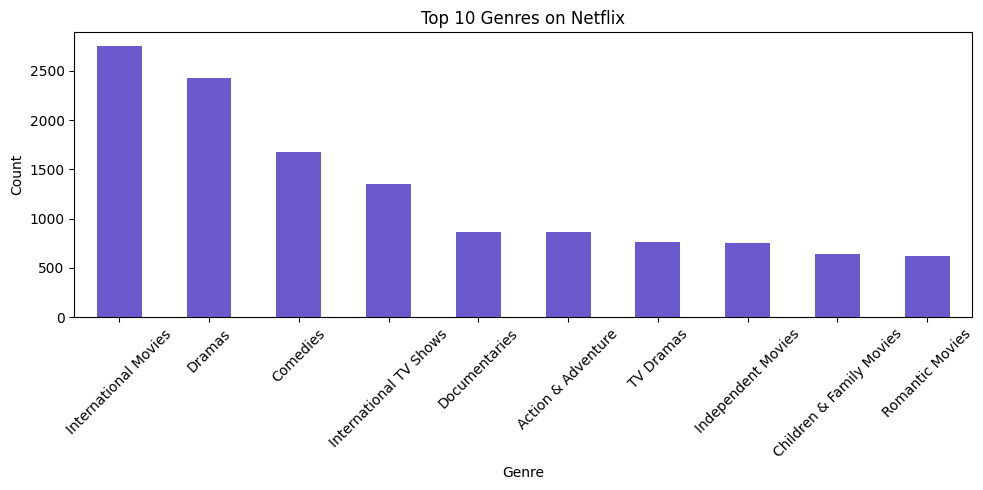

In [43]:
top_genres.head(10).plot(kind='bar', figsize=(10,5), color='slateblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Q3: Which countries produce the most content available on Netflix? **

# **We did the same thing as the previous question because some records contain multiple countries.**

In [44]:
countries_series = df['country'].dropna().str.split(', ')
all_countries = countries_series.explode()
top_countries = all_countries.value_counts()
top_countries.sort_values(ascending=False).head(10)

,count
country,
United States,3689
India,1046
Unknown,831
United Kingdom,804
Canada,445
France,393
Japan,318
Spain,232
South Korea,231


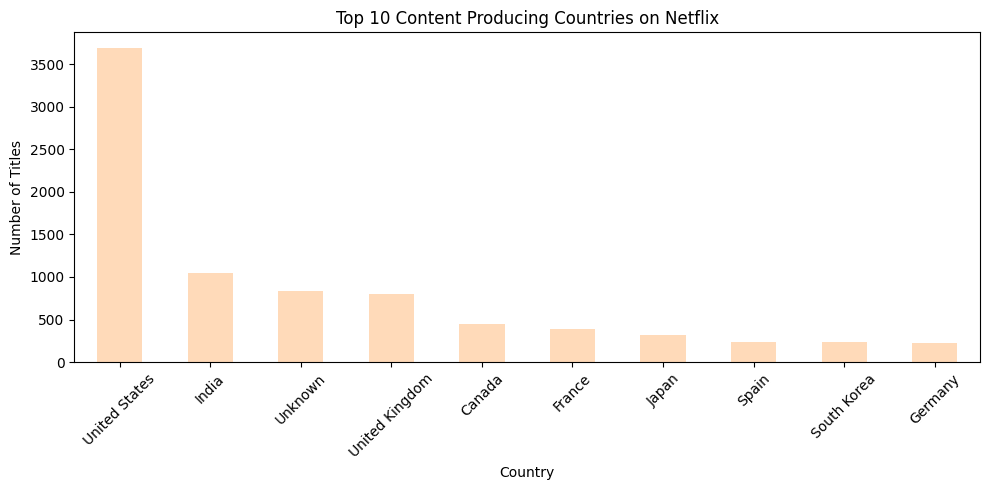

In [45]:
top_countries.head(10).plot(kind='bar', figsize=(10,5), color='peachpuff')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Q4: Are there any trends in content addition dates? **

In [46]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [47]:
df.dropna(subset=['date_added'], inplace=True)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [48]:
content_per_year = df['year_added'].value_counts().sort_index()
print(content_per_year)

year_added
2000      10
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


Over Year

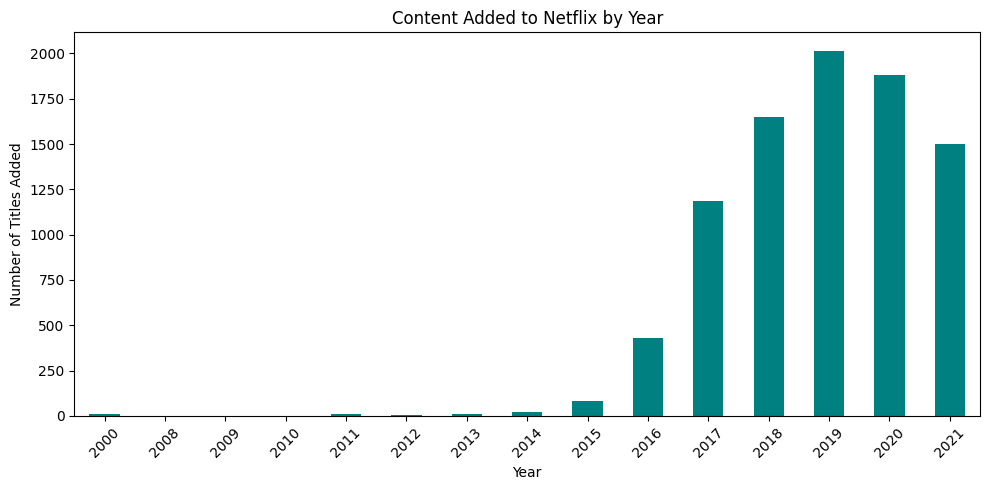

In [49]:
content_per_year.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Content Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Over Month

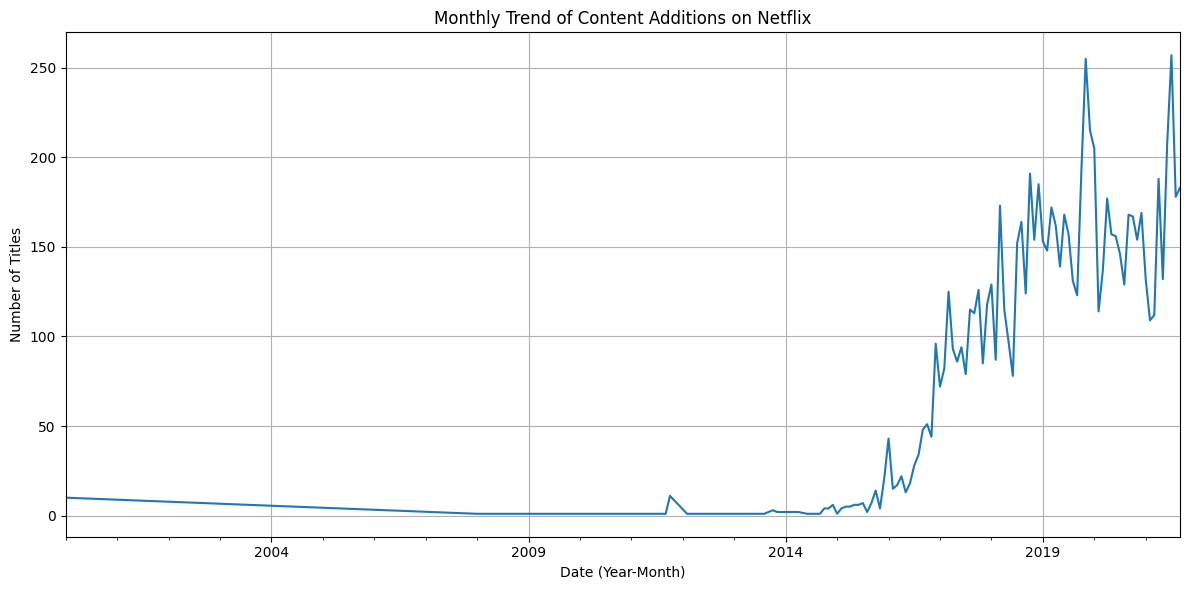

In [50]:
monthly_trend = df.groupby(df['date_added'].dt.to_period('M')).size()
monthly_trend.plot(figsize=(12,6), title='Monthly Trend of Content Additions on Netflix')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.grid(True)
plt.show()

# **Q5: What is the average duration of movies and TV shows? **

In [51]:
movies = df[df['type'] == 'Movie'].copy()
shows = df[df['type'] == 'TV Show'].copy()

In [52]:
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)
print(movies['duration_mins'])

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_mins, Length: 6131, dtype: float64


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3340898962.py:1: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)


In [53]:
shows['duration_seasons'] = shows['duration'].str.extract('(\d+)').astype(float)
print(shows['duration_seasons'])

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_seasons, Length: 2676, dtype: float64


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-364820770.py:1: SyntaxWarning: invalid escape sequence '\d'
  shows['duration_seasons'] = shows['duration'].str.extract('(\d+)').astype(float)


In [54]:
avg_movie_duration = movies['duration_mins'].mean()
avg_show_seasons = shows['duration_seasons'].mean()
#Seasons con't be float,, so need to use round
avg_show_seasons  = round(avg_show_seasons)

In [55]:
print(f"Average movie duration: {avg_movie_duration:.1f} minutes")
print(f"Average number of seasons for TV shows: {avg_show_seasons}")

Average movie duration: 99.6 minutes
Average number of seasons for TV shows: 2


# **Q6:How has the number of releases changed over the years? **

In [56]:
release_counts = df['release_year'].value_counts().sort_index()
print(release_counts)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


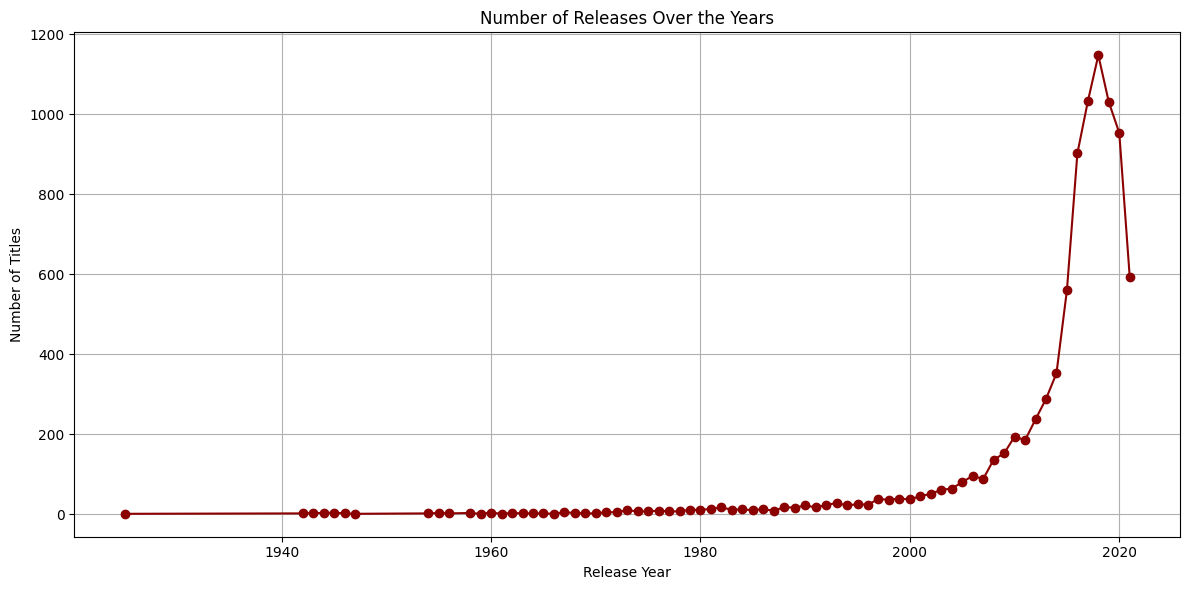

In [57]:
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o', color='darkred')
plt.title('Number of Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Q7:Which ratings are the most common, and how are they distributed between movies and TV shows? **

In [58]:
rating_counts = df['rating'].value_counts()
print(rating_counts)

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
Not Rated       7
TV-Y7-FV        6
NC-17           3
UR              3
Name: count, dtype: int64


In [59]:
common_ratings = df.groupby('type')['rating'].agg([
    #ratings are the most common
    lambda x: x.value_counts().idxmax(),
    lambda x: x.value_counts().max()
])
common_ratings.columns = ['Most Common Rating', 'Count']
common_ratings

,Most Common Rating,Count
type,,
Movie,TV-MA,2062
TV Show,TV-MA,1145


# **Who are the most popular directors on Netflix?**

In [60]:
directors = df.loc[
    (df['director'].str.strip().str.lower() != 'unknown'),
    'director'
]
all_directors = directors.str.split(',').explode().str.strip()

In [61]:
top_directors = all_directors.value_counts().head(10)
print("Most popular directors on Netflix")
top_directors

Most popular directors on Netflix


,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12


# **Who are the most popular actors on Netflix?**

In [62]:
cast = df.loc[
    (df['cast'].str.strip().str.lower() != 'unknown'),
    'cast'
]
all_cast = cast.str.split(',').explode().str.strip()

In [63]:
top_cast = all_cast.value_counts().head(10)

print("Most popular actors on Netflix")
top_cast

Most popular actors on Netflix


,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


# **Which countries produce more genres of content than others?**

**1.Filter the data:**
**We remove rows where the genre or country is unknown.**

**2.Split multiple values:**
**Some movies or shows have more than one genre or are made by more than one country.**
**We split the “listed_in” (genres) and “country” columns into lists.**

**3.Explode the lists:**
**We use the .explode() function to make one row per country and per genre.**

**4.Clean the text:**
**We remove spaces and empty strings to make sure the data is clean.**

**5.Count genres per country:**
**We use .groupby() to count how many times each genre appears in each country.**

**6.Find the top genre for each country:**
**We sort by count and keep the most frequent (popular) genre for every country.**

In [64]:

filtered_df = df.loc[
    (df['listed_in'].str.strip().str.lower() != 'unknown') &
    (df['country'].str.strip().str.lower() != 'unknown')
]

In [65]:

exploded = filtered_df.copy()
exploded['genre'] = exploded['listed_in'].str.split(',')
exploded['country_clean'] = exploded['country'].str.split(',')


exploded = exploded.explode('genre')
exploded = exploded.explode('country_clean')

In [66]:
# Clean space
exploded['genre'] = exploded['genre'].str.strip()
exploded['country_clean'] = exploded['country_clean'].str.strip()

exploded = exploded[exploded['country_clean'] != '']

In [67]:
genre_country_counts = exploded.groupby(['country_clean', 'genre']).size().reset_index(name='count')

In [68]:
# most popular in each country
top_genre_by_country = (
    genre_country_counts
    .sort_values('count', ascending=False)
    .groupby('country_clean')
    .first()
    .reset_index()
    .sort_values('count', ascending=False)  #final Sort
)

print("Most popular genre in each country:")
top_genre_by_country.head(10)

Most popular genre in each country:


,country_clean,genre,count
45,India,International Movies,864
115,United States,Dramas,835
114,United Kingdom,British TV Shows,225
36,France,International Movies,207
100,South Korea,International TV Shows,152
53,Japan,International TV Shows,151
102,Spain,International Movies,140
33,Egypt,International Movies,99
20,Canada,Comedies,94
38,Germany,International Movies,94


In [69]:
import plotly.express as px

fig = px.choropleth(
    top_genre_by_country,
    locations='country_clean',
    locationmode='country names',
    color='genre',
    title='Most popular genre in each country:',
    color_continuous_scale='Viridis'
)
fig.show()